

1. Importação de Bibliotecas


In [ ]:
pip install split-folders


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import splitfolders
import zipfile
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2. Carregamento e Preparação dos Dados

2.1 Divisão de datasets

In [ ]:

# Caminho para a pasta com os dados originais
input_folder = '/content/drive/MyDrive/carros'

# Caminho e proporções para a divisão: 80% treinamento, 20% validação
splitfolders.ratio(input_folder, output="output", seed=42, ratio=(.8, .2))

print("Divisão dos dados concluída.")

Copying files: 1450 files [00:33, 43.01 files/s] 

Divisão dos dados concluída.


2.2 Preparação dos dados

In [ ]:
# Limpar a saída (output)
from IPython.display import clear_output

# Caminho para a pasta com os dados originais
input_folder = '/content/drive/MyDrive/carros'

# Caminho e proporções para a divisão: 80% treinamento, 20% validação
splitfolders.ratio(input_folder, output="output", seed=42, ratio=(.8, .2))

print("Divisão dos dados concluída.")


Copying files: 1450 files [00:04, 333.70 files/s]

Divisão dos dados concluída.


In [ ]:
train_dir = '/content/output/train'
validation_dir = '/content/output/val'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 1201 images belonging to 2 classes.
Found 329 images belonging to 2 classes.


3. Construção do Modelo

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

4. Treinamento do Modelo

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,  # depende do tamanho do seu conjunto de dados
    epochs=15,
    validation_data=validation_generator,
    validation_steps=17)  # depende do tamanho do seu conjunto de validação

Epoch 1/15
38/47 [=======================>......] - ETA: 19s - loss: 0.5737 - accuracy: 0.7852

47/47 [==============================] - 93s 2s/step - loss: 0.5737 - accuracy: 0.7852 - val_loss: 0.2082 - val_accuracy: 0.9453


In [ ]:
# Após treinar o modelo, adicione este comando para imprimir o caminho onde o modelo foi salvo
model.save('car_class.h5')
print(f"Modelo salvo em: meu_modelo.h5")

Modelo salvo em: meu_modelo.h5


5. Avaliação do Modelo

In [ ]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/teste carros',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test accuracy:', test_acc)

Found 3 images belonging to 1 classes.
 1/50 [..............................] - ETA: 4s - loss: 4.4500 - accuracy: 0.3333

50/50 [==============================] - 0s 526us/step - loss: 4.4500 - accuracy: 0.3333
Test accuracy: 0.3333333432674408


Found 3 images belonging to 1 classes.
 1/50 [..............................] - ETA: 7s - loss: 4.4500 - accuracy: 0.3333

50/50 [==============================] - 0s 519us/step - loss: 4.4500 - accuracy: 0.3333
Test accuracy: 0.3333333432674408
1/1 [==============================] - 0s 115ms/step


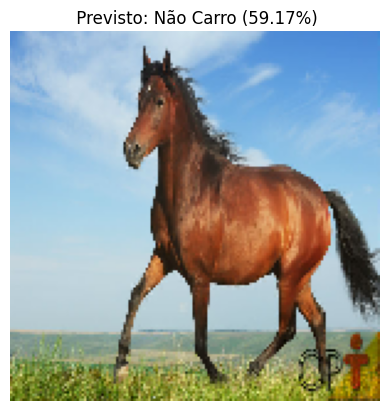

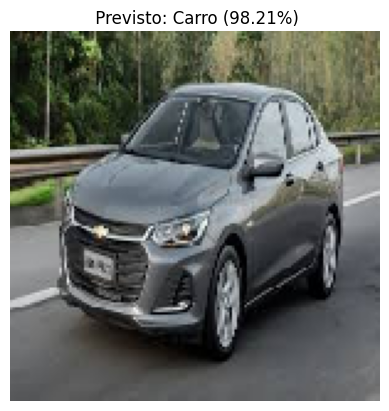

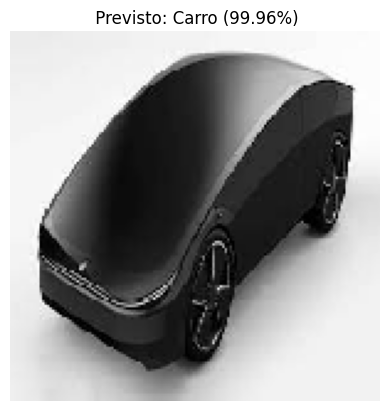

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Carregue o gerador de teste
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/teste carros',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Avalie o modelo no conjunto de teste e obtenha as previsões
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test accuracy:', test_acc)

# Crie um dicionário para mapear rótulos de classe para nomes de classe
class_names = {0: 'Não Carro', 1: 'Carro', 2: 'Classe 2', 3: 'Classe 3'}

# Itere sobre o gerador de teste e imprima as imagens e suas classificações
for i in range(len(test_generator)):
    batch = test_generator[i]
    images = batch[0]
    labels = batch[1]

    # Obtenha as previsões do modelo para o lote atual
    predictions = model.predict(images)

    # Itere sobre cada imagem no lote
    for j in range(len(images)):
        image = images[j]
        label = labels[j]
        prediction = predictions[j]

        # Obtenha a classe real
        true_class = np.argmax(label)

        # Obtenha a classe prevista e a porcentagem de certeza
        predicted_class = np.argmax(prediction)
        certainty = prediction[predicted_class] * 100

        # Plote a imagem
        plt.imshow(image)
        plt.axis('off')
        plt.title(f' Previsto: {class_names[predicted_class]} ({certainty:.2f}%)')
        plt.show()
